# 'King County (USA )House Price Prediction with ANN'
'The King County house dataset contains information about houses sold in King County, Washington, between May 2014 and May 2015. The dataset includes 21 variables, which are:'

* id: A unique identifier for each house.
* date: The date the house was sold, in the format YYYY-MM-DD.
* price: The price of the house in US dollars.
* bedrooms: The number of bedrooms in the house.
* bathrooms: The number of bathrooms in the house.
* sqft_living: The square footage of the living area.
* sqft_lot: The square footage of the lot.
* floors: The number of floors in the house.
* waterfront: A binary variable indicating whether the house is on a waterfront.
* view: A rating of the view from the house, from 0 to 5.
* condition: A rating of the condition of the house, from 1 to 5.
* grade: A rating of the overall quality of the house, from 1 to 12.
* sqft_above: The square footage of the house above ground level.
* sqft_basement: The square footage of the house below ground level.
* yr_built: The year the house was built.
* yr_renovated: The year the house was renovated.
* zipcode: The zip code of the house.
* lat: The latitude of the house.
* long: The longitude of the house.
* sqft_living15: The average square footage of the living areas of the 15 closest houses.
* sqft_lot15: The average square footage of the lots of the 15 closest houses.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf

print(tf.__version__)

2.10.0


i have imported all the libraries which will required for data operations.

In [2]:
df= pd.read_csv("kc_house_data.csv.zip")

with the help of read_csv i imported the data in form of dataframe. i have taken this data from kaggle.The data set name is king country usa house price prediction.

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
df.dtypes.value_counts()


int64      15
float64     5
object      1
dtype: int64

df.pandas provide a concise summary of the DataFrame, including information about the data types, non-null values, and memory usage.
so here we have 21612 rows and 21 columns in which  1 column have object,15 columns have int64 and 5 columns have float64  as their datatypes

In [6]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

with the help of isnull() function i have checked if there is any null values present or not

### Exploratory Data Analysis

In [7]:
# exploring the price 

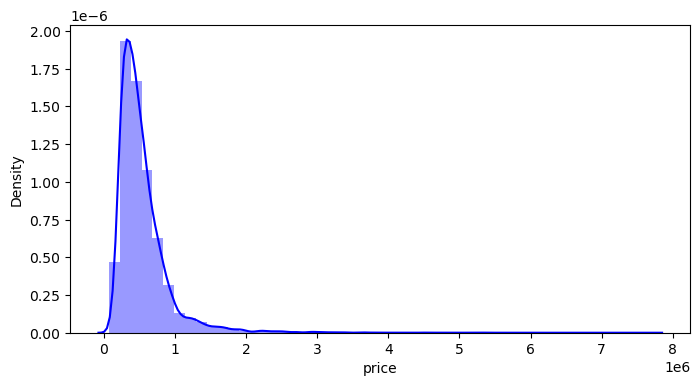

In [8]:
plt.figure(figsize =(8, 4),dpi = 100)
sns.distplot(df['price'],color="blue",x=df["price"],kde="True")
plt.show()

 most of the house prices ranges between 0-2 million.It make sense to drop extreme outliers: houses with price > 2 millions

In [9]:
# exploring the number of bedrooms

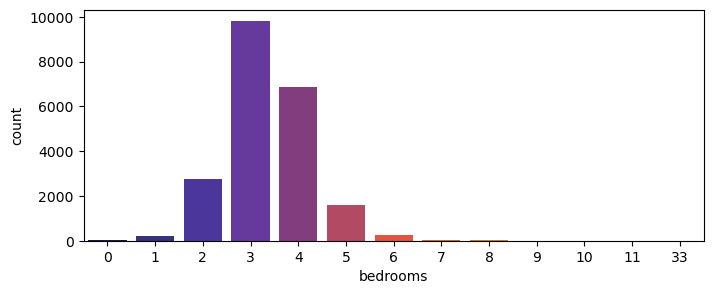

In [10]:
plt.figure(figsize = (8, 3), dpi = 100)
sns.countplot(data = df, x = 'bedrooms',palette = "CMRmap")
plt.show()

The vast majority of houses have 2 to 5 bedrooms, but there is one notable exception: a massive mansion with 33 bedrooms.

In [11]:
#plotting hitmap to check the correlation of the variable

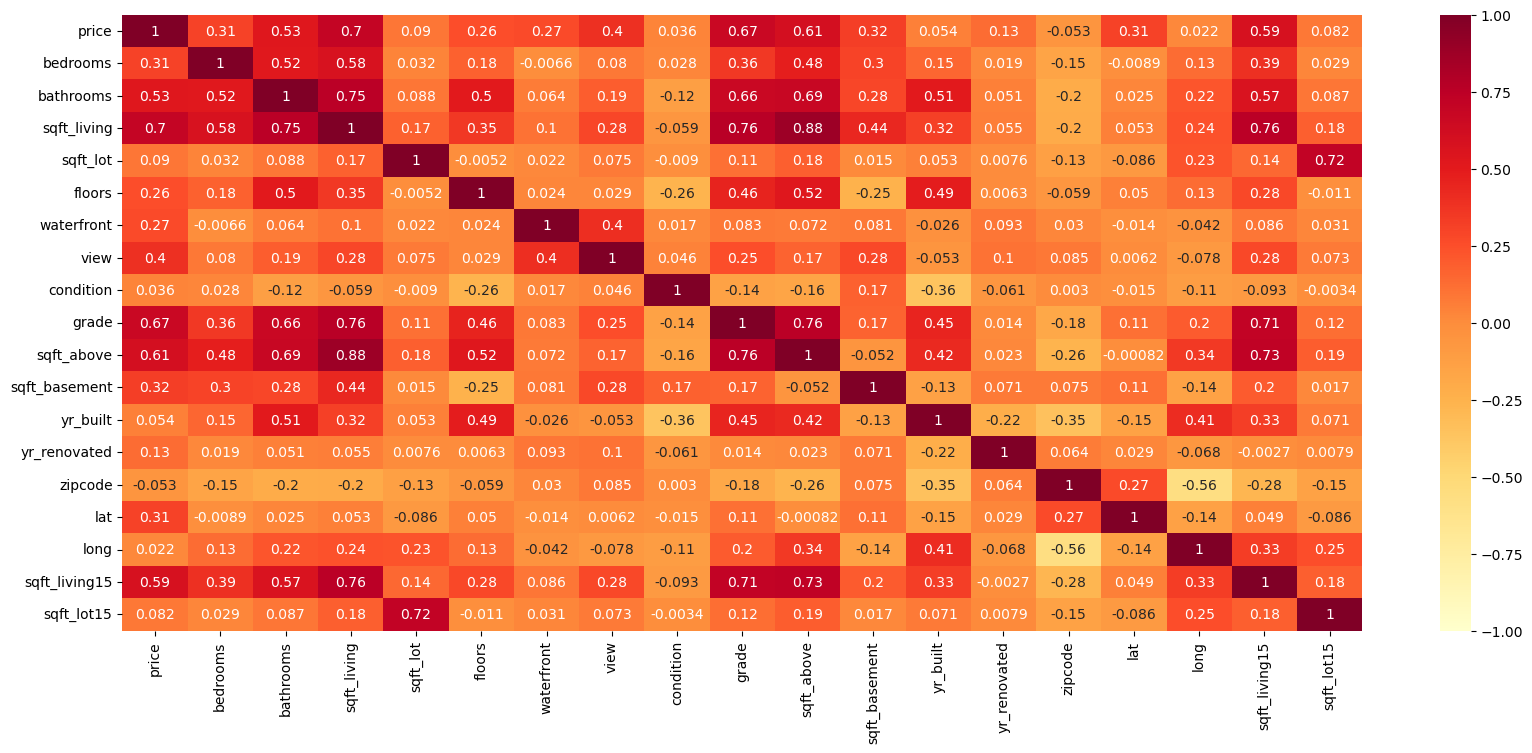

In [12]:
plt.figure(figsize=(20,8))

sns.heatmap(df.iloc[:,2:].corr(),annot=True,vmax=1,vmin=-1,cmap="YlOrRd")
plt.show()

'Square_foot_living' has good (>=0.7) linear correlation with 'Price'

### let's visulize it using scatterplot

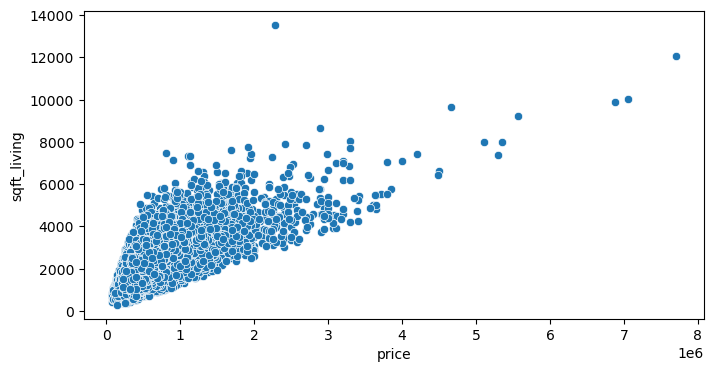

In [13]:
# sqft_living vs price
plt.figure(figsize = (8, 4), dpi = 100)
sns.scatterplot(data = df, x = 'price', y = 'sqft_living')
plt.show()

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

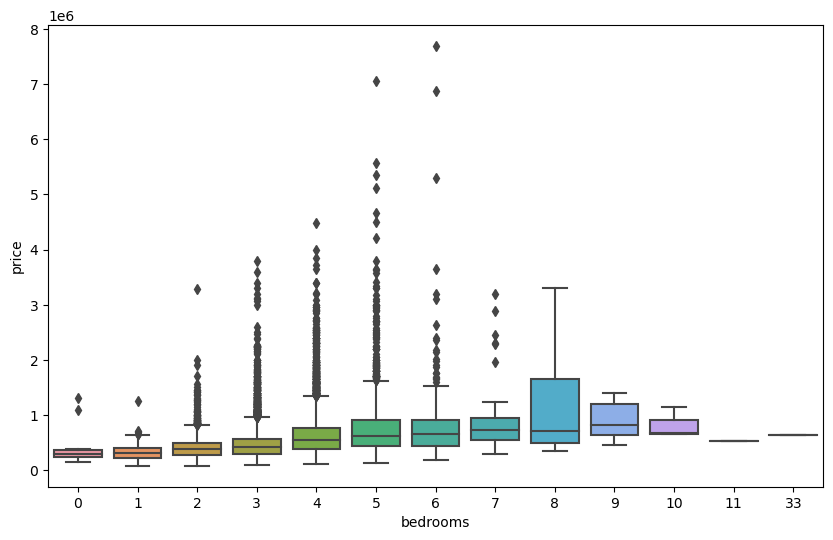

In [14]:
plt.figure(figsize=(10,6))
sns.boxplot(x='bedrooms', y='price', data=df)

As we have seen in countplot, the majority of houses have 2 to 7 bedrooms. Therefore the boxplot depicts that there is various price ranges are there for houses who has 2-7 bedrooms. 

### Checking impact of different factors on prices of the house

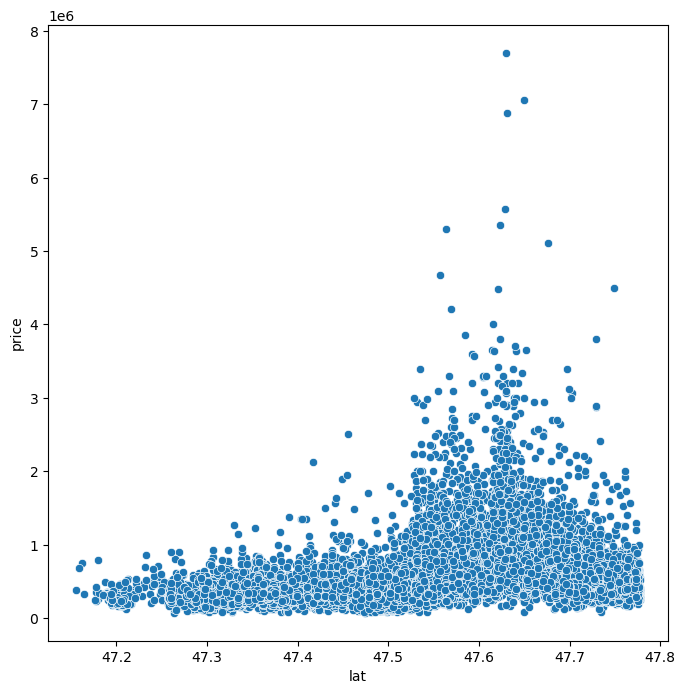

In [15]:
plt.figure(figsize = (8, 8), dpi = 100)
sns.scatterplot(data = df, x = 'lat', y = 'price')
plt.show()

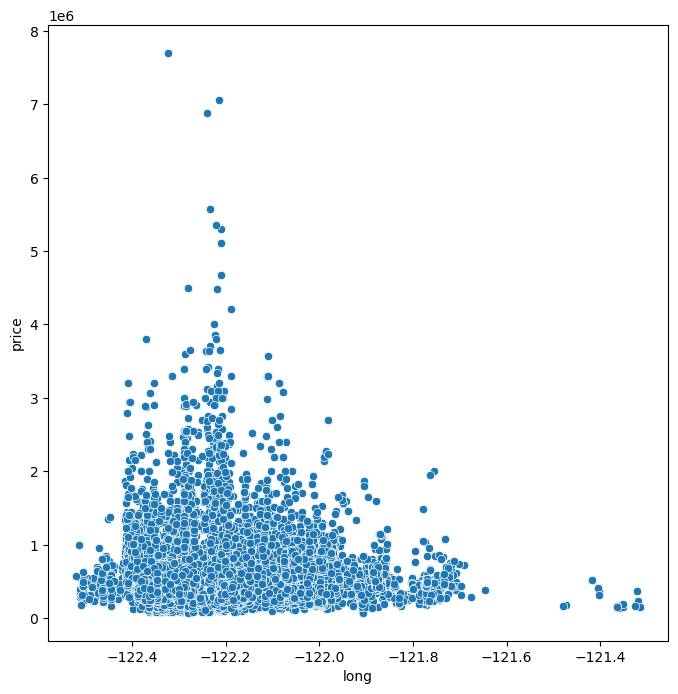

In [16]:
plt.figure(figsize = (8, 8), dpi = 100)
sns.scatterplot(data = df, x = 'long', y = 'price')
plt.show()

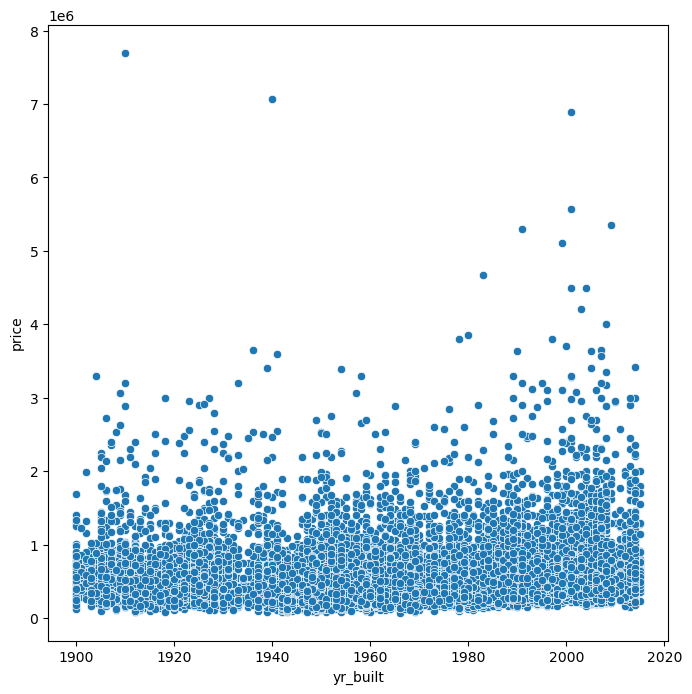

In [17]:
plt.figure(figsize = (8, 8), dpi = 100)
sns.scatterplot(data = df, x = 'yr_built', y = 'price')
plt.show()

### Correcting the datetype

In [18]:
df["date"]=pd.to_datetime(df["date"])

In [19]:
df["date"]

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21608   2014-05-21
21609   2015-02-23
21610   2014-06-23
21611   2015-01-16
21612   2014-10-15
Name: date, Length: 21613, dtype: datetime64[ns]

### Making new feature

In [20]:
df["year"]=df["date"].dt.year

In [21]:
df.drop(["date"],axis=1,inplace =True)

In [22]:
df.drop(["id"],axis=1,inplace=True)

In [23]:
df['year'] = df['year'].map({2014: 0, 2015: 1})

### Coverting all the values in single scale

In [24]:
for i in  df.columns[0:]:
    df[i] = (df[i] - df[i].min()) / (df[i].max() - df[i].min())

In [25]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year
0,0.019266,0.090909,0.12500,0.067170,0.003108,0.0,0.0,0.0,0.5,0.500000,0.097588,0.000000,0.478261,0.000000,0.893939,0.571498,0.217608,0.161934,0.005742,0.0
1,0.060721,0.090909,0.28125,0.172075,0.004072,0.4,0.0,0.0,0.5,0.500000,0.206140,0.082988,0.443478,0.988089,0.626263,0.908959,0.166113,0.222165,0.008027,0.0
2,0.013770,0.060606,0.12500,0.036226,0.005743,0.0,0.0,0.0,0.5,0.416667,0.052632,0.000000,0.286957,0.000000,0.136364,0.936143,0.237542,0.399415,0.008513,1.0
3,0.069377,0.121212,0.37500,0.126038,0.002714,0.0,0.0,0.0,1.0,0.500000,0.083333,0.188797,0.565217,0.000000,0.681818,0.586939,0.104651,0.165376,0.004996,0.0
4,0.057049,0.090909,0.25000,0.104906,0.004579,0.0,0.0,0.0,0.5,0.583333,0.152412,0.000000,0.756522,0.000000,0.368687,0.741354,0.393688,0.241094,0.007871,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,0.037377,0.090909,0.31250,0.093585,0.000370,0.8,0.0,0.0,0.5,0.583333,0.135965,0.000000,0.947826,0.000000,0.515152,0.874055,0.143688,0.194631,0.000986,0.0
21609,0.042623,0.121212,0.31250,0.152453,0.003206,0.4,0.0,0.0,0.5,0.583333,0.221491,0.000000,0.991304,0.000000,0.732323,0.570693,0.130399,0.246257,0.007523,1.0
21610,0.042898,0.060606,0.09375,0.055094,0.000503,0.4,0.0,0.0,0.5,0.500000,0.080044,0.000000,0.947826,0.000000,0.722222,0.705324,0.182724,0.106866,0.001558,0.0
21611,0.042623,0.090909,0.31250,0.098868,0.001132,0.4,0.0,0.0,0.5,0.583333,0.143640,0.000000,0.904348,0.000000,0.131313,0.608975,0.373754,0.173980,0.000731,1.0


Dividing the data into dependent (X )and independent variable (Y)

In [26]:
X= df.iloc[:,1:]
Y= df["price"]

In [27]:
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year
0,0.090909,0.12500,0.067170,0.003108,0.0,0.0,0.0,0.5,0.500000,0.097588,0.000000,0.478261,0.000000,0.893939,0.571498,0.217608,0.161934,0.005742,0.0
1,0.090909,0.28125,0.172075,0.004072,0.4,0.0,0.0,0.5,0.500000,0.206140,0.082988,0.443478,0.988089,0.626263,0.908959,0.166113,0.222165,0.008027,0.0
2,0.060606,0.12500,0.036226,0.005743,0.0,0.0,0.0,0.5,0.416667,0.052632,0.000000,0.286957,0.000000,0.136364,0.936143,0.237542,0.399415,0.008513,1.0
3,0.121212,0.37500,0.126038,0.002714,0.0,0.0,0.0,1.0,0.500000,0.083333,0.188797,0.565217,0.000000,0.681818,0.586939,0.104651,0.165376,0.004996,0.0
4,0.090909,0.25000,0.104906,0.004579,0.0,0.0,0.0,0.5,0.583333,0.152412,0.000000,0.756522,0.000000,0.368687,0.741354,0.393688,0.241094,0.007871,1.0


In [28]:
Y.head()

0    0.019266
1    0.060721
2    0.013770
3    0.069377
4    0.057049
Name: price, dtype: float64

In [29]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       21613 non-null  float64
 1   bathrooms      21613 non-null  float64
 2   sqft_living    21613 non-null  float64
 3   sqft_lot       21613 non-null  float64
 4   floors         21613 non-null  float64
 5   waterfront     21613 non-null  float64
 6   view           21613 non-null  float64
 7   condition      21613 non-null  float64
 8   grade          21613 non-null  float64
 9   sqft_above     21613 non-null  float64
 10  sqft_basement  21613 non-null  float64
 11  yr_built       21613 non-null  float64
 12  yr_renovated   21613 non-null  float64
 13  zipcode        21613 non-null  float64
 14  lat            21613 non-null  float64
 15  long           21613 non-null  float64
 16  sqft_living15  21613 non-null  float64
 17  sqft_lot15     21613 non-null  float64
 18  year  

Data types have been converted into single dtype after scaling the data

In [30]:
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year
0,0.090909,0.12500,0.067170,0.003108,0.0,0.0,0.0,0.5,0.500000,0.097588,0.000000,0.478261,0.000000,0.893939,0.571498,0.217608,0.161934,0.005742,0.0
1,0.090909,0.28125,0.172075,0.004072,0.4,0.0,0.0,0.5,0.500000,0.206140,0.082988,0.443478,0.988089,0.626263,0.908959,0.166113,0.222165,0.008027,0.0
2,0.060606,0.12500,0.036226,0.005743,0.0,0.0,0.0,0.5,0.416667,0.052632,0.000000,0.286957,0.000000,0.136364,0.936143,0.237542,0.399415,0.008513,1.0
3,0.121212,0.37500,0.126038,0.002714,0.0,0.0,0.0,1.0,0.500000,0.083333,0.188797,0.565217,0.000000,0.681818,0.586939,0.104651,0.165376,0.004996,0.0
4,0.090909,0.25000,0.104906,0.004579,0.0,0.0,0.0,0.5,0.583333,0.152412,0.000000,0.756522,0.000000,0.368687,0.741354,0.393688,0.241094,0.007871,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,0.090909,0.31250,0.093585,0.000370,0.8,0.0,0.0,0.5,0.583333,0.135965,0.000000,0.947826,0.000000,0.515152,0.874055,0.143688,0.194631,0.000986,0.0
21609,0.121212,0.31250,0.152453,0.003206,0.4,0.0,0.0,0.5,0.583333,0.221491,0.000000,0.991304,0.000000,0.732323,0.570693,0.130399,0.246257,0.007523,1.0
21610,0.060606,0.09375,0.055094,0.000503,0.4,0.0,0.0,0.5,0.500000,0.080044,0.000000,0.947826,0.000000,0.722222,0.705324,0.182724,0.106866,0.001558,0.0
21611,0.090909,0.31250,0.098868,0.001132,0.4,0.0,0.0,0.5,0.583333,0.143640,0.000000,0.904348,0.000000,0.131313,0.608975,0.373754,0.173980,0.000731,1.0


In [31]:
Y.value_counts(normalize=True)

0.036066    0.007958
0.049180    0.007958
0.062295    0.007357
0.055738    0.007033
0.045902    0.006940
              ...   
0.069772    0.000046
0.168852    0.000046
0.029351    0.000046
0.115738    0.000046
0.042898    0.000046
Name: price, Length: 4028, dtype: float64

### spliting the data into traing and testing set

In [32]:
# train text split 
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=100)

* We have done pre-processing
* Now every data point is in range of 0 to 1 and no categories along with null values

In [33]:
Y_train.value_counts(normalize=True)

0.049180    0.008725
0.036066    0.007800
0.055738    0.007139
0.045902    0.006940
0.062295    0.006940
              ...   
0.019193    0.000066
0.108000    0.000066
0.109351    0.000066
0.045140    0.000066
0.062944    0.000066
Name: price, Length: 3263, dtype: float64

In [34]:
Y_test.value_counts(normalize=True)

0.062295    0.008328
0.036066    0.008328
0.032787    0.007866
0.059016    0.007249
0.045902    0.006940
              ...   
0.046125    0.000154
0.019666    0.000154
0.033049    0.000154
0.121305    0.000154
0.409836    0.000154
Name: price, Length: 1982, dtype: float64

### importing sequential model 

In [35]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [36]:
X_train.shape

(15129, 19)

### Model1 building 

In [37]:
model = Sequential()

In [38]:
model.add(Dense(10,activation ="LeakyReLU",input_dim=X_train.shape[1]))
model.add(Dense(20,activation ="LeakyReLU"))
model.add(Dense(10,activation ="LeakyReLU"))
model.add(Dense(1,activation ="LeakyReLU"))

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                200       
                                                                 
 dense_1 (Dense)             (None, 20)                220       
                                                                 
 dense_2 (Dense)             (None, 10)                210       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 641
Trainable params: 641
Non-trainable params: 0
_________________________________________________________________


In [40]:
model.compile(optimizer="adam",loss="mean_squared_error", metrics=['accuracy'])

In [41]:
history=model.fit(X_train,Y_train,epochs=100, batch_size=16,verbose=1,validation_split=0.2)

Epoch 1/100
757/757 [==============================] - 7s 3ms/step - loss: 0.0014 - accuracy: 8.2624e-05 - val_loss: 7.3548e-04 - val_accuracy: 0.0000e+00
Epoch 2/100
757/757 [==============================] - 2s 2ms/step - loss: 7.3553e-04 - accuracy: 1.6525e-04 - val_loss: 5.8070e-04 - val_accuracy: 0.0000e+00
Epoch 3/100
757/757 [==============================] - 2s 2ms/step - loss: 6.4220e-04 - accuracy: 1.6525e-04 - val_loss: 5.5270e-04 - val_accuracy: 0.0000e+00
Epoch 4/100
757/757 [==============================] - 2s 2ms/step - loss: 5.9527e-04 - accuracy: 1.6525e-04 - val_loss: 5.2235e-04 - val_accuracy: 0.0000e+00
Epoch 5/100
757/757 [==============================] - 1s 2ms/step - loss: 5.7548e-04 - accuracy: 1.6525e-04 - val_loss: 4.7905e-04 - val_accuracy: 0.0000e+00
Epoch 6/100
757/757 [==============================] - 1s 2ms/step - loss: 5.5019e-04 - accuracy: 1.6525e-04 - val_loss: 4.6601e-04 - val_accuracy: 0.0000e+00
Epoch 7/100
757/757 [=============================

### Evaluating ModelPerformance

In [42]:
y_pred = model.predict(X_test)

203/203 [==============================] - 0s 959us/step


In [43]:
from sklearn.metrics import r2_score,mean_absolute_error,explained_variance_score,mean_squared_error
r2_score(Y_test,y_pred)

0.8758158914878225

In [44]:
explained_variance_score(Y_test, y_pred)

0.8771582653086465

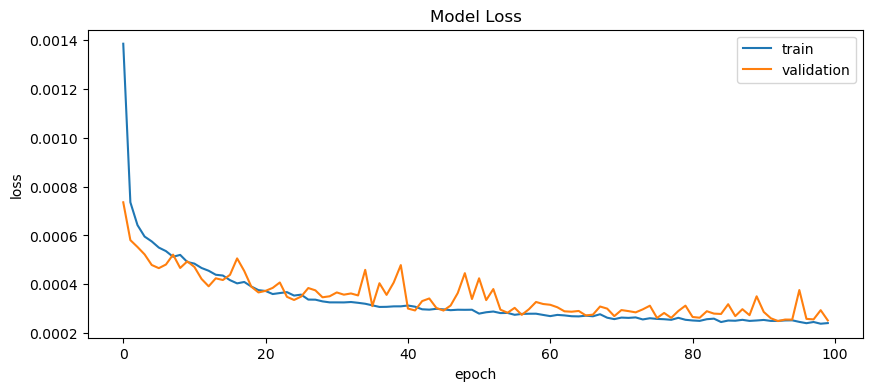

In [45]:
 # summarize history for loss

plt.figure(figsize=(10,4))  
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])   # validation loss values

plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='upper right')

plt.show()

In this model ive added 4 layer in wich 2 of them are input and output layer and remaining 2 are hidden layer. with activation fumction leakyRelu and optimizer adam i got the accuracy of 87%

## Model2 building

In [46]:
model = Sequential()

In [47]:
model.add(Dense(10,activation ="relu",input_dim=X_train.shape[1]))
model.add(Dense(15,activation ="relu"))
model.add(Dense(20,activation ="relu"))
model.add(Dense(1,activation ="relu"))

In [48]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                200       
                                                                 
 dense_5 (Dense)             (None, 15)                165       
                                                                 
 dense_6 (Dense)             (None, 20)                320       
                                                                 
 dense_7 (Dense)             (None, 1)                 21        
                                                                 
Total params: 706
Trainable params: 706
Non-trainable params: 0
_________________________________________________________________


In [49]:
model.compile(optimizer="adam",loss="mean_squared_error")

In [50]:
history=model.fit(X_train,Y_train,epochs=100, batch_size=20,verbose=1,validation_split=0.2)

Epoch 1/100
606/606 [==============================] - 2s 2ms/step - loss: 0.0015 - val_loss: 8.4205e-04
Epoch 2/100
606/606 [==============================] - 1s 2ms/step - loss: 7.5391e-04 - val_loss: 6.4275e-04
Epoch 3/100
606/606 [==============================] - 1s 2ms/step - loss: 6.5815e-04 - val_loss: 6.4210e-04
Epoch 4/100
606/606 [==============================] - 1s 2ms/step - loss: 5.9567e-04 - val_loss: 5.2879e-04
Epoch 5/100
606/606 [==============================] - 1s 1ms/step - loss: 5.7105e-04 - val_loss: 5.0511e-04
Epoch 6/100
606/606 [==============================] - 1s 2ms/step - loss: 5.5957e-04 - val_loss: 5.2202e-04
Epoch 7/100
606/606 [==============================] - 1s 2ms/step - loss: 5.4238e-04 - val_loss: 5.4244e-04
Epoch 8/100
606/606 [==============================] - 1s 2ms/step - loss: 5.3150e-04 - val_loss: 4.6209e-04
Epoch 9/100
606/606 [==============================] - 1s 2ms/step - loss: 4.9300e-04 - val_loss: 4.4916e-04
Epoch 10/100
606/606 [=

### Evaluating ModelPerformance

In [51]:
y_pred = model.predict(X_test)

203/203 [==============================] - 0s 1ms/step


In [52]:
from sklearn.metrics import r2_score,mean_absolute_error,explained_variance_score
r2_score(Y_test,y_pred)

0.8670946325740603

In [53]:
explained_variance_score(Y_test, y_pred)

0.8672080929415803

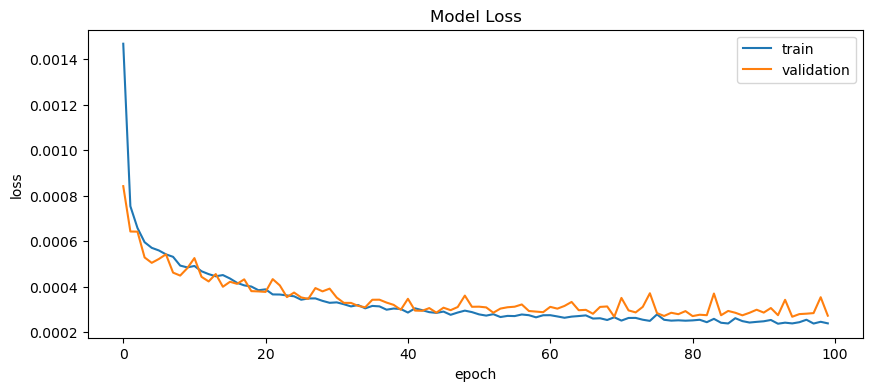

In [54]:
 # summarize history for loss

plt.figure(figsize=(10,4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])   # validation loss values

plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='upper right')

plt.show()

In this model ive added 4 layer in wich 2 of them are input and output layer and remaining 2 are hidden layer. with activation fumction Relu and optimizer adam i got the accuracy of 86%

## Model3 building 

In [55]:
model = Sequential()

In [56]:
model.add(Dense(20,activation ="tanh",input_dim=X_train.shape[1]))
model.add(Dense(20,activation ="tanh"))
model.add(Dense(20,activation ="tanh"))
model.add(Dense(20,activation ="tanh"))
model.add(Dense(20,activation ="tanh"))

model.add(Dense(1,activation ="tanh"))

In [57]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 20)                400       
                                                                 
 dense_9 (Dense)             (None, 20)                420       
                                                                 
 dense_10 (Dense)            (None, 20)                420       
                                                                 
 dense_11 (Dense)            (None, 20)                420       
                                                                 
 dense_12 (Dense)            (None, 20)                420       
                                                                 
 dense_13 (Dense)            (None, 1)                 21        
                                                                 
Total params: 2,101
Trainable params: 2,101
Non-traina

In [58]:
model.compile(optimizer="RMSprop",loss="mean_squared_error")

In [59]:
history=model.fit(X_train,Y_train,epochs=100, batch_size=20,verbose=1,validation_split=0.2)

Epoch 1/100
606/606 [==============================] - 2s 2ms/step - loss: 0.0023 - val_loss: 0.0011
Epoch 2/100
606/606 [==============================] - 1s 2ms/step - loss: 9.4853e-04 - val_loss: 6.8172e-04
Epoch 3/100
606/606 [==============================] - 1s 2ms/step - loss: 7.7401e-04 - val_loss: 0.0011
Epoch 4/100
606/606 [==============================] - 1s 2ms/step - loss: 6.6791e-04 - val_loss: 0.0017
Epoch 5/100
606/606 [==============================] - 1s 2ms/step - loss: 6.1131e-04 - val_loss: 5.3470e-04
Epoch 6/100
606/606 [==============================] - 1s 2ms/step - loss: 5.8993e-04 - val_loss: 5.8467e-04
Epoch 7/100
606/606 [==============================] - 1s 2ms/step - loss: 5.6233e-04 - val_loss: 9.5791e-04
Epoch 8/100
606/606 [==============================] - 1s 2ms/step - loss: 5.5016e-04 - val_loss: 6.1578e-04
Epoch 9/100
606/606 [==============================] - 1s 2ms/step - loss: 5.2914e-04 - val_loss: 4.2510e-04
Epoch 10/100
606/606 [=============

### Evaluating ModelPerformance

In [60]:
y_pred = model.predict(X_test)

203/203 [==============================] - 0s 1ms/step


In [61]:
r2_score(Y_test,y_pred)

0.8613905815459193

In [62]:
explained_variance_score(Y_test, y_pred)

0.8614518111279927

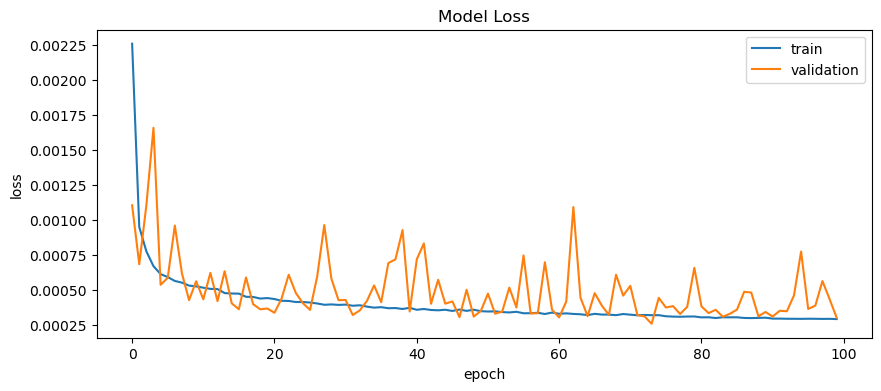

In [63]:

plt.figure(figsize=(10,4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])   # validation loss values

plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='upper right')

plt.show()

In this model ive added 5 layer in wich 2 of them are input and output layer and remaining 3 are hidden layer. with activation fumction "tanh" and optimizer RMSprop i got the accuracy of 86%

## Model4  building

In [64]:
model = Sequential()

In [65]:
model.add(Dense(10,activation ="swish",input_dim=X_train.shape[1]))
model.add(Dense(15,activation ="swish"))
model.add(Dense(20,activation ="swish"))
model.add(Dense(25,activation ="swish"))
model.add(Dense(30,activation ="swish"))


model.add(Dense(1,activation ="swish"))

In [66]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 10)                200       
                                                                 
 dense_15 (Dense)            (None, 15)                165       
                                                                 
 dense_16 (Dense)            (None, 20)                320       
                                                                 
 dense_17 (Dense)            (None, 25)                525       
                                                                 
 dense_18 (Dense)            (None, 30)                780       
                                                                 
 dense_19 (Dense)            (None, 1)                 31        
                                                                 
Total params: 2,021
Trainable params: 2,021
Non-traina

In [67]:
model.compile(optimizer="RMSprop",loss="mean_absolute_error",metrics=['accuracy'])

In [68]:
history=model.fit(X_train,Y_train,epochs=100, batch_size=10,verbose=1,validation_split=0.2)

Epoch 1/100
1211/1211 [==============================] - 3s 2ms/step - loss: 0.0183 - accuracy: 8.2624e-05 - val_loss: 0.0157 - val_accuracy: 0.0000e+00
Epoch 2/100
1211/1211 [==============================] - 2s 2ms/step - loss: 0.0159 - accuracy: 8.2624e-05 - val_loss: 0.0159 - val_accuracy: 0.0000e+00
Epoch 3/100
1211/1211 [==============================] - 2s 2ms/step - loss: 0.0152 - accuracy: 1.6525e-04 - val_loss: 0.0145 - val_accuracy: 0.0000e+00
Epoch 4/100
1211/1211 [==============================] - 3s 2ms/step - loss: 0.0148 - accuracy: 1.6525e-04 - val_loss: 0.0193 - val_accuracy: 0.0000e+00
Epoch 5/100
1211/1211 [==============================] - 2s 2ms/step - loss: 0.0147 - accuracy: 1.6525e-04 - val_loss: 0.0141 - val_accuracy: 0.0000e+00
Epoch 6/100
1211/1211 [==============================] - 2s 2ms/step - loss: 0.0144 - accuracy: 1.6525e-04 - val_loss: 0.0145 - val_accuracy: 0.0000e+00
Epoch 7/100
1211/1211 [==============================] - 2s 2ms/step - loss: 0.014

### Evaluating ModelPerformance

In [69]:
y_pred = model.predict(X_test)

203/203 [==============================] - 0s 1ms/step


In [70]:
r2_score(Y_test,y_pred)

0.8768988330122011

In [71]:
explained_variance_score(Y_test, y_pred)

0.8839635780165844

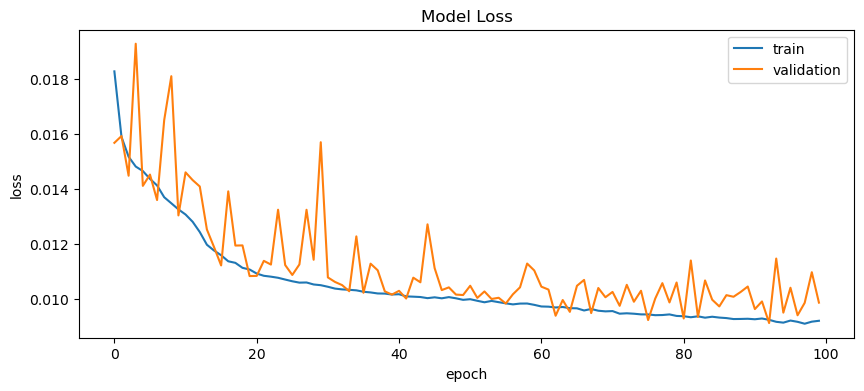

In [72]:

plt.figure(figsize=(10,4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])   # validation loss values

plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='upper right')

plt.show()

In this model ive added 5 layer in wich 2 of them are input and output layer and remaining 3 are hidden layer. with activation fumction "swish" and optimizer adam i got the accuracy of 87%